In [9]:
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from controlnet_aux import CannyDetector

/amax/hchuz/miniconda3/envs/py310/lib/python3.10/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


In [10]:
processor = CannyDetector()

In [2]:
with open('/amax/hchuz/architectural_heritage/相似的几个2/Snipaste_2023-02-21_13-33-06.json', 'r') as f:
    data = json.load(f)

In [3]:
sample = data['shapes'][0]
sample['points']

[[0.7977715835309404, 234.0],
 [0.0, 391.833011871319],
 [0.0, 538.3682002905198],
 [1221.0, 536.1320520672881],
 [1221.0, 392.4569604188065],
 [1217.7233928371393, 233.46145575483706]]

In [5]:
polygon_points_list = [sample['points'] for sample in data['shapes']]
polygon_points_list

[[[0.7977715835309404, 234.0],
  [0.0, 391.833011871319],
  [0.0, 538.3682002905198],
  [1221.0, 536.1320520672881],
  [1221.0, 392.4569604188065],
  [1217.7233928371393, 233.46145575483706]],
 [[833.5098234608575, 575.3094529491135],
  [1146.3065564164133, 576.3015076015355],
  [1143.4019666438546, 895.2046464077773],
  [835.8043871905305, 887.9009090256266]],
 [[429.4032339964531, 574.3019160265383],
  [764.5054558205318, 575.507150581239],
  [763.6423484994126, 891.612643498501],
  [444.703618012181, 888.8090584865067],
  [443.8616250063391, 875.1765308987351],
  [431.70053119291026, 875.9010825698624]],
 [[56.0, 573.1029320557222],
  [363.9062177933665, 574.4044373113676],
  [364.8088734728138, 816.4079941745343],
  [345.60226834215746, 816.3059904714311],
  [345.6050687519029, 875.8071949076938],
  [331.60107025733754, 876.0],
  [331.6025844300944, 891.5018186066976],
  [49.80120603766469, 886.2044667021123]],
 [[0.3041831679708039, 538.1046217116383],
  [0.0741913465579727, 565.7

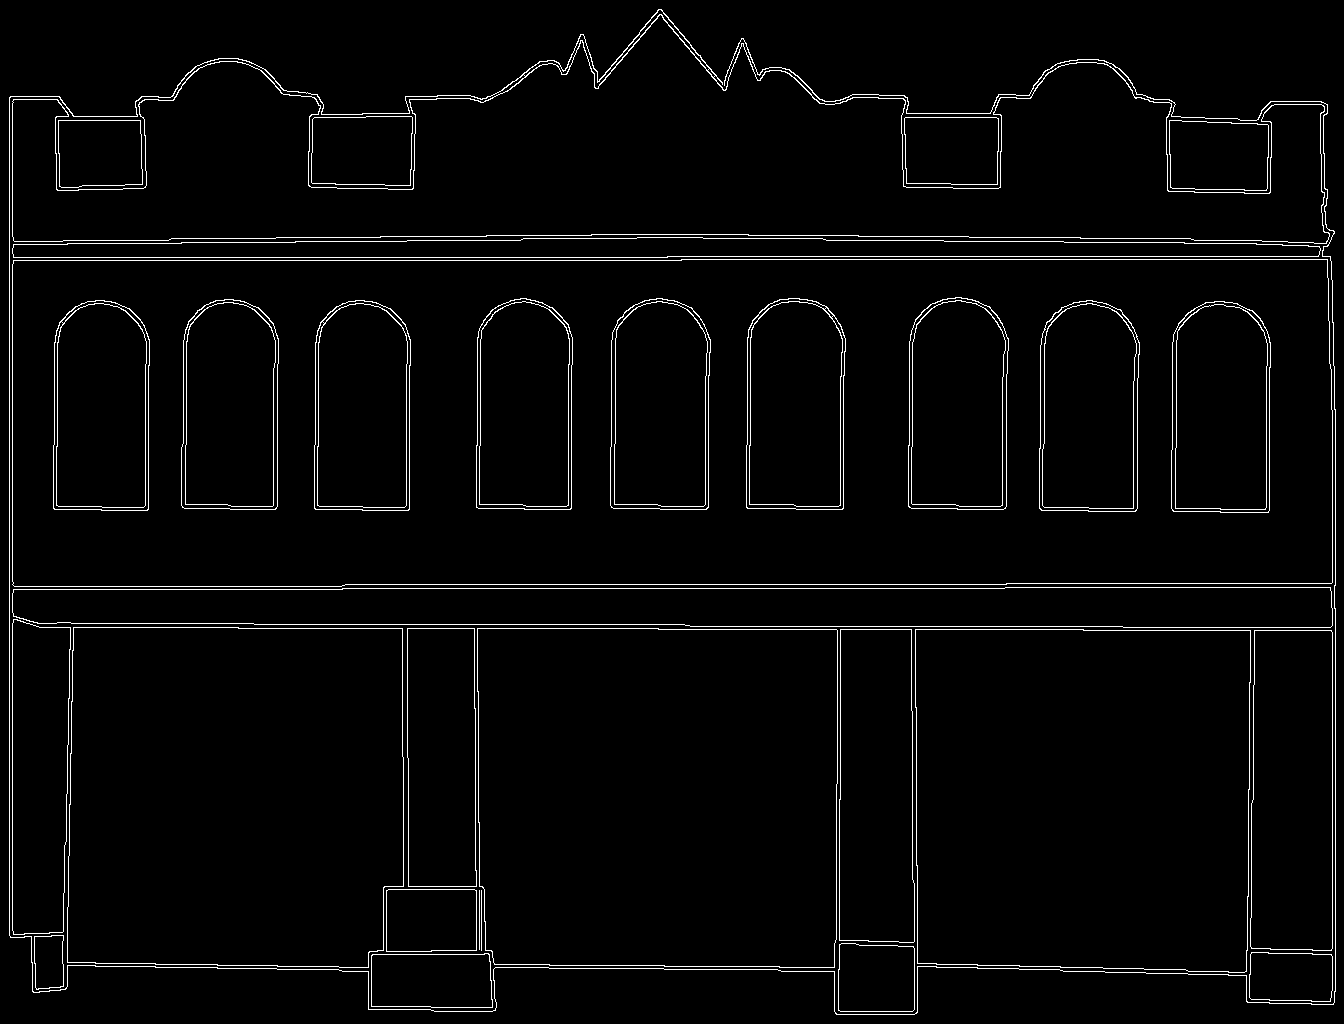

In [13]:
# 计算图像宽高（根据多边形的坐标动态调整）
all_points = np.concatenate(polygon_points_list)  # 将所有多边形的点合并为一个数组
x_coords, y_coords = all_points[:, 0], all_points[:, 1]  # 分别获取所有点的 x 和 y 坐标
max_x, max_y = int(np.ceil(x_coords.max())), int(np.ceil(y_coords.max()))  # 找到最大值并取整
min_x, min_y = int(np.floor(x_coords.min())), int(np.floor(y_coords.min()))  # 找到最小值并取整

# 为了避免多边形刚好贴边，可以增加一些边距
margin = 10
width = max_x - min_x + 2 * margin
height = max_y - min_y + 2 * margin

# 创建一个空白图像
image = np.zeros((height, width), dtype=np.uint8)

# 遍历每个多边形并绘制到图像上
for polygon_points in polygon_points_list:
    # 将每个多边形的点转换为整数坐标，并加上偏移量（考虑到最小值和边距）
    polygon_points = np.array(polygon_points, dtype=np.float32)
    polygon_points[:, 0] -= min_x - margin  # 调整 x 坐标
    polygon_points[:, 1] -= min_y - margin  # 调整 y 坐标
    polygon_points = polygon_points.astype(np.int32)
    
    # 在图像上绘制多边形
    cv2.polylines(image, [polygon_points], isClosed=True, color=255, thickness=2)

# 使用 Canny 边缘检测
canny_image = processor(image, low_threshold=50, high_threshold=200, detect_resolution=1024, image_resolution=1024)
# 显示结果
canny_image = Image.fromarray(canny_image)
canny_image

In [14]:
canny_image.save('temp/Snipaste_2023-02-21_13-33-06_canny.png')